<a href="https://colab.research.google.com/github/Eehae/CurrencyForecaster/blob/main/Currency_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
#@title Install Prophet and Investpy
#call prophet
from fbprophet  import Prophet
#install investpy
!pip install investpy
import investpy

In [110]:
#@title Input and call data
#@markdown Currency format XXX/YYY
CurrencyCouple = "EUR/KRW" #@param {type:"string"}
#@markdown Date format dd/mm/yyyy (End date preferably today)
StartDate = "12/03/2021" #@param {type:"string"}
EndDate = "15/03/2022" #@param {type:"string"}

#EUR-KRW DATA CALL
df = investpy.currency_crosses.get_currency_cross_historical_data(CurrencyCouple, StartDate, EndDate, as_json=False, order='ascending', interval='Daily')
df = df.reset_index()
df['ds'] = df['Date']
df['y'] = df['Close']
data = df[['ds', 'y']]
PredictionDays =  30#@param {type:"integer"}

In [ ]:
#@title Build model
model = Prophet(yearly_seasonality=True,weekly_seasonality=True, daily_seasonality=False)
model.fit(data)
future = model.make_future_dataframe(periods=PredictionDays, freq='D')
forecast = model.predict(future)

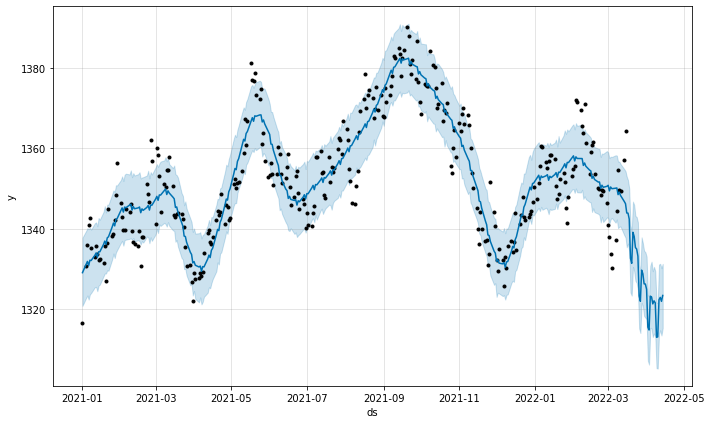

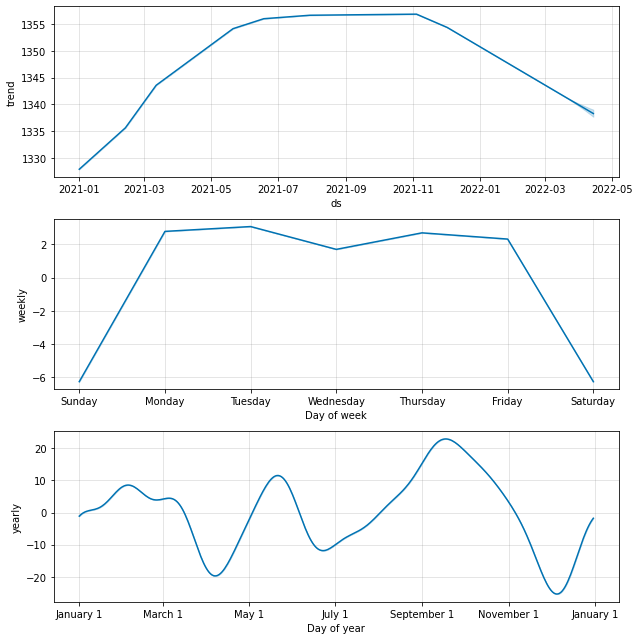

In [ ]:
#@title Visualise Forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [ ]:
#@title Interactive Graph
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)
plot_components_plotly(model, forecast)

In [ ]:
#@title Forecast on wanted date
Wanted_Date = "2022-04-10" #@param {type:"date"}

wdval = forecast[forecast['ds'] == Wanted_Date]
#print(wdval)
wdd = wdval['ds']
wdv = wdval['trend']
print(wdd)
print(wdv)

338   2022-04-10
Name: ds, dtype: datetime64[ns]
338    1338.779894
Name: trend, dtype: float64
